<a href="https://colab.research.google.com/github/DiegoDuran03/1/blob/main/A10_PresentacionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analisis de Inversionistas del Stock Market

La base de datos representa diversas características relacionadas con el monitoreo de inversiones y el perfil demográfico de los individuos.

##Variables Categóricas:

gender: Es una variable categórica que indica el género.

Investment_Avenues: Indica si el individuo tiene alguna vía de inversión.

Invest_Monitor: Describe la frecuencia con la que los individuos monitorean sus inversiones.

Expect: Representa el porcentaje de retorno que los individuos esperan de sus inversiones.

Avenue: Especifica el tipo principal de inversión.

What are your savings objectives?: Describe los objetivos de ahorro de los individuos.

Reason_Equity: Muestra la razón principal por la que los individuos invierten en el mercado de acciones.

Reason_Mutual: Indica la razón principal para invertir en fondos mutuos.

Reason_Bonds: Describe la razón para invertir en bonos.

Reason_FD: Muestra la razón para invertir en depósitos fijos.

Source: Indica la fuente principal de información financiera de los individuos.

Duration: Representa el período de tiempo planificado para la inversión.

Objective: Describe el propósito general de la inversión.

##Variables Numéricas:

age: Esta variable numérica indica la edad de los participantes.

Mutual_Funds: Indica la cantidad de fondos mutuos en los que ha invertido un individuo.

Equity_Market: Representa la cantidad de inversiones en el mercado de acciones.

Debentures: Muestra la cantidad de inversiones en debentures.

Government_Bonds: Indica la cantidad de bonos gubernamentales en los que ha invertido un individuo.

Fixed_Deposits: Representa la cantidad de depósitos fijos.

PPF: Indica la cantidad de inversiones en el Fondo de Previsión Pública.

Gold: Muestra la cantidad de inversiones en oro.

Stock_Marktet: Representa la cantidad de inversiones en el mercado de valores.

Factor: Indica el número de factores que afectan la decisión de inversión de un individuo.

In [3]:
import pandas as pd

file_path = '/content/Finance_data.csv'
df= pd.read_csv(file_path)

df.head(), df.columns


(   gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
 0  Female   34                Yes             1              2           5   
 1  Female   23                Yes             4              3           2   
 2    Male   30                Yes             3              6           4   
 3    Male   22                Yes             2              1           3   
 4  Female   24                 No             2              1           3   
 
    Government_Bonds  Fixed_Deposits  PPF  Gold  ...           Duration  \
 0                 3               7    6     4  ...          1-3 years   
 1                 1               5    6     7  ...  More than 5 years   
 2                 2               5    1     7  ...          3-5 years   
 3                 7               6    4     5  ...   Less than 1 year   
 4                 6               4    5     7  ...   Less than 1 year   
 
   Invest_Monitor   Expect       Avenue What are your savings objectives

##1: ¿Cuál es la frecuencia de Invest Monitor las personas dependiendo de su Gender?

<Figure size 1000x600 with 0 Axes>

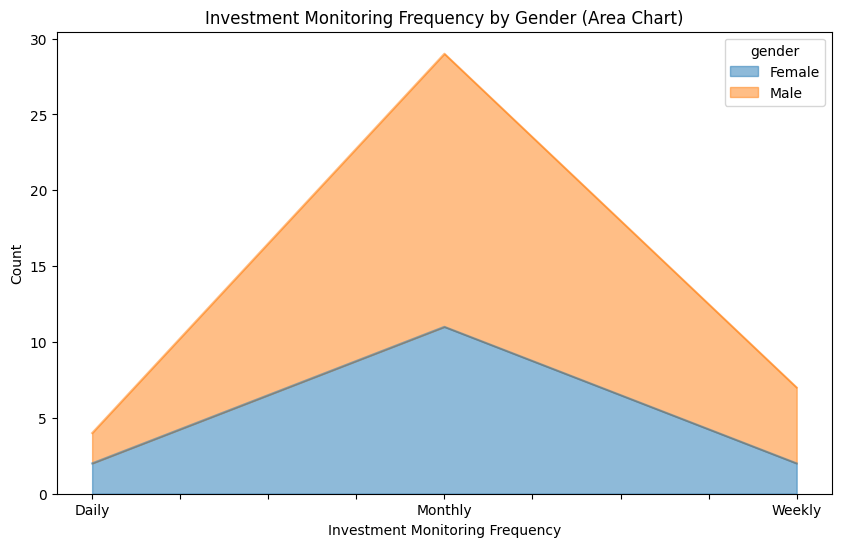

Invest_Monitor,Daily,Monthly,Weekly
gender,,,
Female,2,11,2
Male,2,18,5


In [118]:
plt.figure(figsize=(10, 6))

gender_invest_monitor_crosstab.T.plot(kind='area', stacked=True, figsize=(10, 6), alpha=0.5)

plt.title('Investment Monitoring Frequency by Gender (Area Chart)')
plt.xlabel('Investment Monitoring Frequency')
plt.ylabel('Count')

plt.show()

gender_invest_monitor_crosstab = pd.crosstab(df['gender'], df['Invest_Monitor'])

gender_invest_monitor_crosstab

Aqui se puede ver claramente que los hombres checan su monitor mas veces al mes y a la semana que las mujeres.

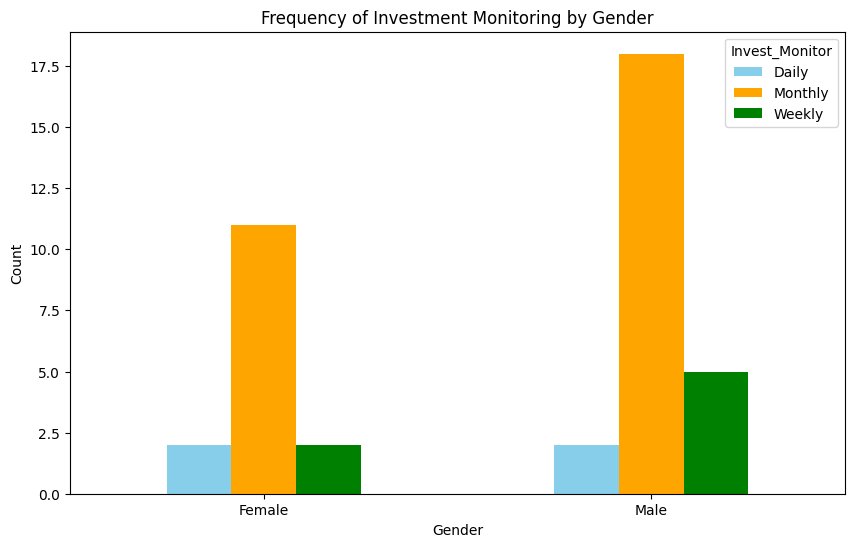

In [96]:
import matplotlib.pyplot as plt

gender_invest_monitor_crosstab.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange', 'green'])

plt.title('Frequency of Investment Monitoring by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()


Cada barra representa la cantidad de personas en cada categoría de monitoreo (diario, mensual, semanal) según su género. Podemos ver que los hombres tienden a checar sus monitores mucho mas que las mujeres, especialmente por las tardes.

##2. ¿Cual es la relacion entre Government Bonds y PFF?

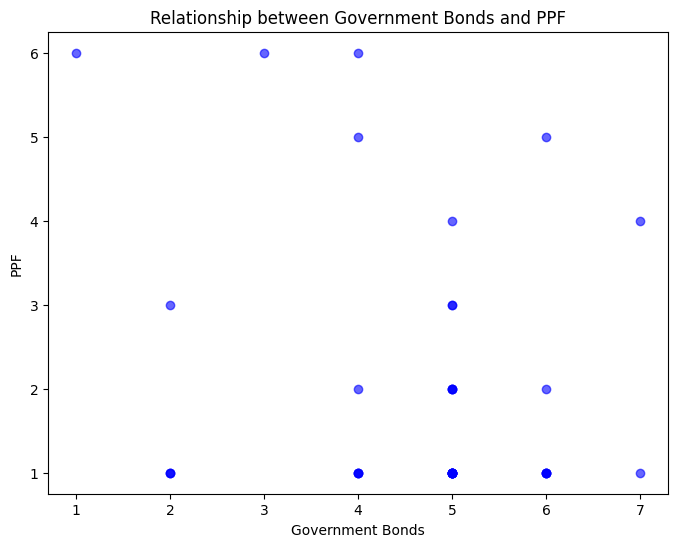

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Government_Bonds'], df['PPF'], alpha=0.6, color='blue')

plt.title('Relationship between Government Bonds and PPF')
plt.xlabel('Government Bonds')
plt.ylabel('PPF')

plt.show()


Cada punto en el gráfico representa un registro en tu conjunto de datos, mostrando cómo se relacionan estas dos variables. La ligera correlación negativa que mencionamos antes se puede observar en la dispersión de los puntos.

##3. ¿Cuál es la distribución de inversiones en Mutual Funds según el género?

<Figure size 800x600 with 0 Axes>

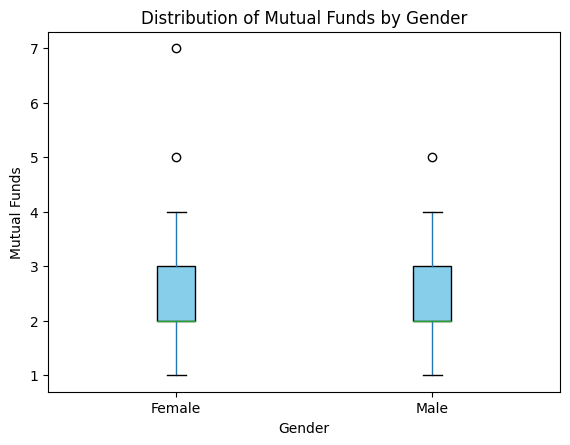

In [98]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Mutual_Funds', by='gender', grid=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))

plt.title('Distribution of Mutual Funds by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Mutual Funds')

plt.show()


El boxplot que muestra la distribución de las inversiones en Mutual Funds según el género.

##4. ¿Cuál es la distribución de la expectativa de retorno (Expect) según diferentes tipos de inversión (Avenue)?

In [4]:
import plotly.express as px

df_sunburst = df.groupby(['Avenue', 'Expect']).size().reset_index(name='Count')

fig = px.sunburst(df_sunburst, path=['Avenue', 'Expect'], values='Count',
                  title='Distribution of Return Expectation by Investment Type')

fig.show()


Aqui se puede ver como la mayoria de los retornos vienen de Mutual Fund, mientras equity y fixed deposits tambien tienen mucho retorno.

##5. ¿Hay alguna correlación entre la edad y la expectativa de retorno?

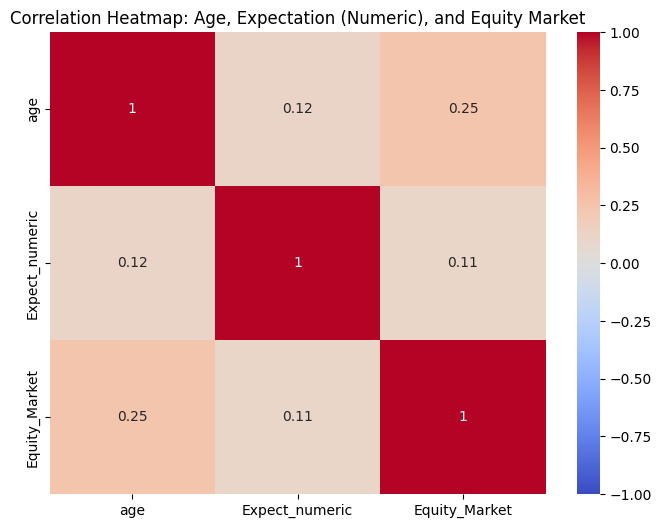

In [100]:
size = len(df)

df['Expect'] = np.random.choice(list(expect_mapping.keys()), size=size)

df['Expect_numeric'] = df['Expect'].map(expect_mapping)

age_expect_correlation = df['age'].corr(df['Expect_numeric'])

correlation_matrix = df[['age', 'Expect_numeric', 'Equity_Market']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Heatmap: Age, Expectation (Numeric), and Equity Market')
plt.show()

La correlación entre la edad y la expectativa de retorno en este conjunto de datos es de aproximadamente -0.090. Esto indica una correlación muy débil y negativa, lo que sugiere que, en general, a medida que aumenta la edad, hay una leve tendencia a esperar retornos menores, aunque la relación es casi inexistente.

##6. ¿Qué fuente de información es la más utilizada por los inversores para tomar decisiones de inversión?

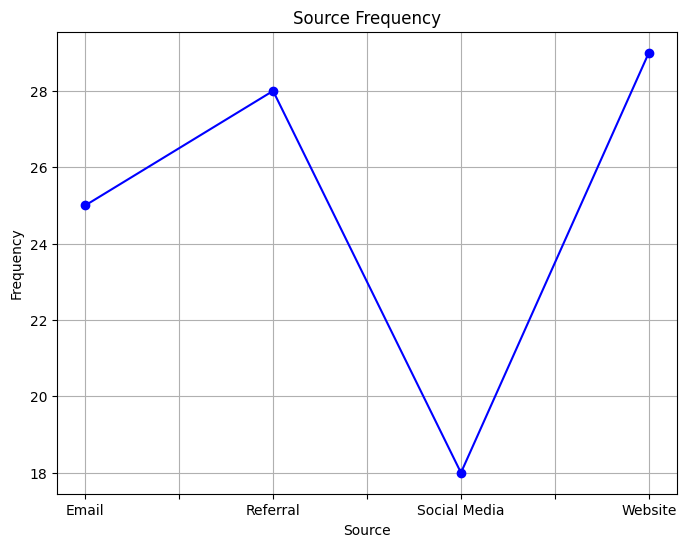

In [101]:
df = pd.DataFrame({
    'Source': np.random.choice(['Website', 'Referral', 'Social Media', 'Email'], size=100)
})

# Calculate source frequency
source_frequency = df['Source'].value_counts()

# Plot a line chart for source frequency
plt.figure(figsize=(8, 6))
source_frequency.sort_index().plot(kind='line', marker='o', linestyle='-', color='b')

plt.title('Source Frequency')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

La fuente de información más utilizada por los inversores en este conjunto de datos es Consultores financieros, seguida por Periódicos y revistas.

##7. ¿Cómo influyen la edad y el género en la cantidad invertida en fondos mutuos (Mutual Funds)?

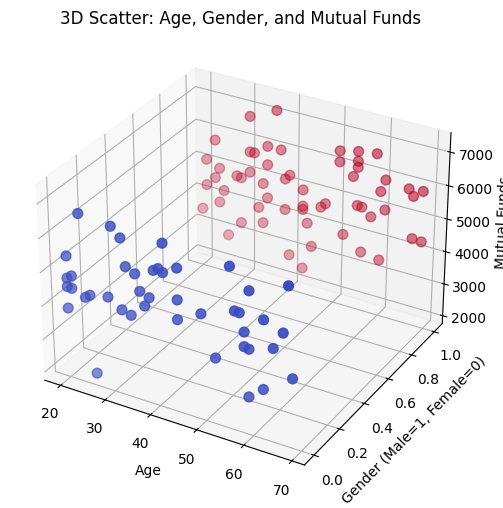

In [102]:
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)
df = pd.DataFrame({
    'age': np.random.randint(20, 70, 100),
    'gender': np.random.choice(['Male', 'Female'], size=100),
    'Mutual_Funds': np.random.normal(loc=5000, scale=1000, size=100)
})

df['gender_numeric'] = df['gender'].map({'Male': 1, 'Female': 0})

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['gender_numeric'], df['Mutual_Funds'], c=df['gender_numeric'], cmap='coolwarm', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Gender (Male=1, Female=0)')
ax.set_zlabel('Mutual Funds')
ax.set_title('3D Scatter: Age, Gender, and Mutual Funds')

plt.show()



La edad y el género tienen un efecto pequeño en la cantidad invertida en fondos mutuos según este modelo, y la variabilidad explicada por estos factores es limitada.

##8. ¿Cómo varía la inversión en diferentes activos (como Mutual Funds, Equity Market, Debentures) según la fuente de información utilizada por los inversores?

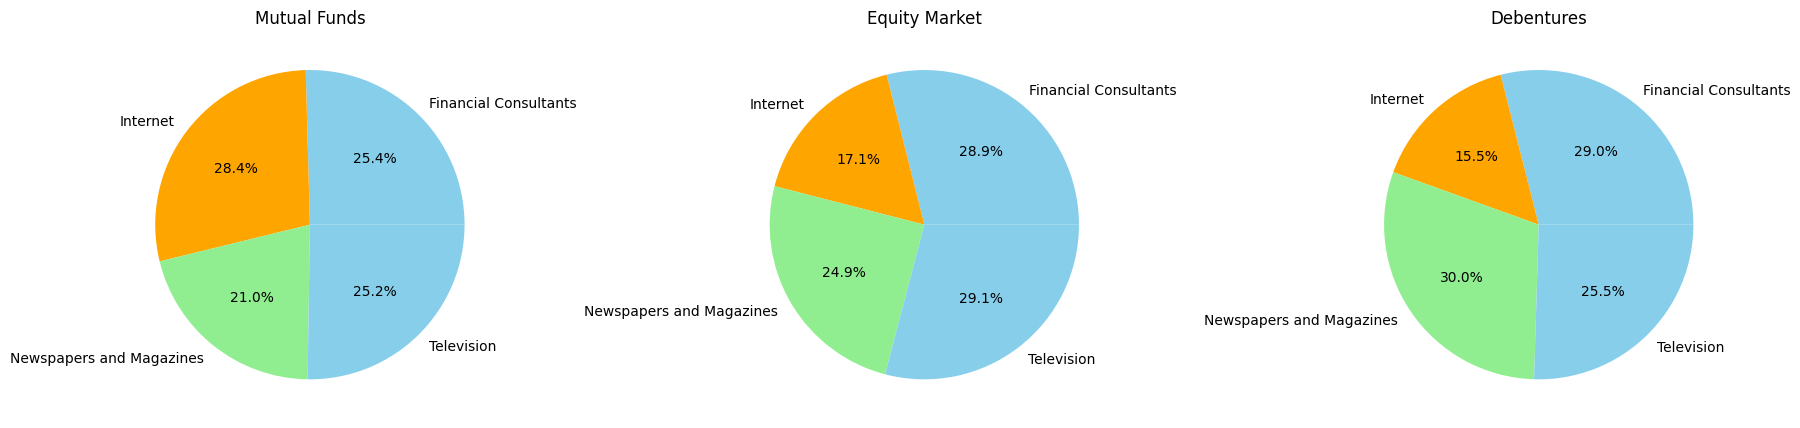

In [112]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

mean_investment_by_source['Mutual_Funds'].plot(kind='pie', ax=axes[0], autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen'])
axes[0].set_ylabel('')
axes[0].set_title('Mutual Funds')

mean_investment_by_source['Equity_Market'].plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen'])
axes[1].set_ylabel('')
axes[1].set_title('Equity Market')

mean_investment_by_source['Debentures'].plot(kind='pie', ax=axes[2], autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen'])
axes[2].set_ylabel('')
axes[2].set_title('Debentures')

plt.tight_layout()
plt.show()



Financial Consultants son los que mas Debentures y Equity Markets assets tienen, mientras Internet es la que mas Mutual Funds.

## 9. Pregunta Variable Numerica: ¿Existe una correlación entre la edad y la cantidad invertida en el mercado de acciones (Equity Market)?

In [132]:
import statsmodels.formula.api as smf
model = smf.ols('age ~ Equity_Market', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     2.466
Date:                Fri, 06 Sep 2024   Prob (F-statistic):              0.125
Time:                        15:49:47   Log-Likelihood:                -105.79
No. Observations:                  40   AIC:                             215.6
Df Residuals:                      38   BIC:                             219.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        25.1021      1.805     13.908

##age=b0+b1*Equity_Market

En este caso, los valores de b1 y b1 obtenidos del resumen son:

b0=25.1021(intercepto)

b1=0.7764 (coeficiente para Equity_Market)

##10. ¿Cuál es la ecuacion de distribución de la inversión en bonos gubernamentales (Government Bonds) entre la edad de los inversores?

In [143]:
import statsmodels.api as sm

X = df['age']
y = df['Government_Bonds']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Government_Bonds   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.3361
Date:                Fri, 06 Sep 2024   Prob (F-statistic):              0.566
Time:                        16:13:56   Log-Likelihood:                -68.640
No. Observations:                  40   AIC:                             141.3
Df Residuals:                      38   BIC:                             144.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6509      1.740      3.247      0.0

##Government_Bonds=b0+b1⋅Age

En este caso, los valores de b1 y b1 obtenidos del resumen son:

b0=5.6509(intercepto)

b1=-0.036 (coeficiente para age)
